In [2]:
# from folium.plugins import HeatMap
import pandas as pd
import tqdm
import sys

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
def plot_heatmap(df, file):
    map = folium.Map([df['etrs89_latitude'].median(), df['etrs89_longitude'].median()], zoom_start=5)
    datapoints = []
    for index, row in tqdm.tqdm(df.iterrows(), total=len(df.index)):
        datapoints.append([row['etrs89_latitude'], row['etrs89_longitude']])
    HeatMap(datapoints).add_to(map)
    map.save(file)

In [3]:
sys.path.append(r'/mnt/vasp-got-da/scripts/team_data_analytics/josefin/adas_mtd/')

In [4]:
import src.db.db_helper_dsl3 as dbh

In [5]:
gnss = dbh.read_db_to_df('gnss_country_and_cities', 'da_rwup')

Connection successful


In [6]:
gnss

,etrs89_height,etrs89_latitude,etrs89_longitude,timestamp,vehicle_id,recording_id,path,country,nearest_city,dist_to_nearest_city_km,write_to_db_date
0,65.880544,53.595334,9.921747,2022-01-28 07:00:36,FH2369,FH2369_20220128_064536,/mnt/dsl-data-storage/vasp3/FH2369_20220128_06...,Germany,Hamburg,11.74,2024/03/13_14:28:01
1,54.215857,53.572292,9.957776,2022-01-28 07:10:36,FH2369,FH2369_20220128_064536,/mnt/dsl-data-storage/vasp3/FH2369_20220128_06...,Germany,Hamburg,5.88,2024/03/13_14:28:01
2,47.561064,53.705946,9.769952,2022-01-28 06:45:36,FH2369,FH2369_20220128_064536,/mnt/dsl-data-storage/vasp3/FH2369_20220128_06...,Germany,Hamburg,38.42,2024/03/13_14:28:01
3,58.788095,53.630140,9.866580,2022-01-28 06:55:36,FH2369,FH2369_20220128_064536,/mnt/dsl-data-storage/vasp3/FH2369_20220128_06...,Germany,Hamburg,20.69,2024/03/13_14:28:01
4,62.628385,53.576085,9.938242,2022-01-28 07:05:36,FH2369,FH2369_20220128_064536,/mnt/dsl-data-storage/vasp3/FH2369_20220128_06...,Germany,Hamburg,8.04,2024/03/13_14:28:01
...,...,...,...,...,...,...,...,...,...,...,...
96795,795.934758,48.461198,8.368686,2023-05-17 13:04:52,FH2369,FH2369_20230517_124952,/mnt/dsl-data-storage/vasp3/FH2369_20230517_12...,Germany,Strasbourg,71.69,2024/03/13_14:28:01
96796,706.346269,48.460930,8.444194,2023-05-17 13:14:52,FH2369,FH2369_20230517_124952,/mnt/dsl-data-storage/vasp3/FH2369_20230517_12...,Germany,Strasbourg,79.81,2024/03/13_14:28:01
96797,835.319398,48.457448,8.256914,2023-05-17 12:49:52,FH2369,FH2369_20230517_124952,/mnt/dsl-data-storage/vasp3/FH2369_20230517_12...,Germany,Strasbourg,60.05,2024/03/13_14:28:01
96798,925.063029,48.470917,8.311360,2023-05-17 12:59:52,FH2369,FH2369_20230517_124952,/mnt/dsl-data-storage/vasp3/FH2369_20230517_12...,Germany,Strasbourg,65.11,2024/03/13_14:28:01


In [8]:
gnssg = gnss['recording_id'].nunique()

5806

In [8]:
gnssg = gnss[gnss['recording_id']=='FH2369_20220322_141936']

In [9]:
gnssg

,etrs89_height,etrs89_latitude,etrs89_longitude,timestamp,vehicle_id,recording_id,path,country,nearest_city,dist_to_nearest_city_km,write_to_db_date
19165,61.007251,51.913138,5.487116,2022-03-22 15:09:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,'s-Hertogenbosch,45.41,2024/03/13_14:28:01
19166,56.124631,51.867276,5.584056,2022-03-22 15:19:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,43.54,2024/03/13_14:28:01
19167,112.499795,52.126108,5.877155,2022-03-22 14:19:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,25.46,2024/03/13_14:28:01
19168,72.719666,52.100783,5.757660,2022-03-22 14:29:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,27.45,2024/03/13_14:28:01
19169,62.176960,52.049976,5.643025,2022-03-22 14:39:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,33.11,2024/03/13_14:28:01
19170,55.417190,52.021163,5.575753,2022-03-22 14:49:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,39.12,2024/03/13_14:28:01
19171,54.566523,51.919865,5.565702,2022-03-22 15:04:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,41.63,2024/03/13_14:28:01
19172,55.565291,51.869716,5.502973,2022-03-22 15:14:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,'s-Hertogenbosch,39.36,2024/03/13_14:28:01
19173,82.566661,52.121684,5.818022,2022-03-22 14:24:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,26.82,2024/03/13_14:28:01
19174,83.424724,52.066341,5.690847,2022-03-22 14:34:36,FH2369,FH2369_20220322_141936,/mnt/dsl-data-storage/vasp3/FH2369_20220322_14...,Netherlands,Arnhem,29.46,2024/03/13_14:28:01


In [9]:
concats = dbh.read_db_to_df('concatenated_files_metadata', 'da_concats')

Connection successful


In [10]:
concats

,file_identifier,filename_csv,filename_parquet,file_path_parquet,file_path_csv,recording_id,first_ptp_time,FLR_sw,FLC_sw,SRx_sw,segments,FLR_files,FLC_files,SRx_files,BLF_files,comment,write_to_db_date,last_ptp_time,rec_id_has_failed_FLR_SW811
0,FM1073_20220812_114923_0-3_58xvv,FM1073_20220812_114923_0-3_58xvv.csv,FM1073_20220812_114923_0-3_58xvv.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220812_114923,1.660305e+09,SW911,VVT0241p1_R3,PI21B_2801,"{0,1,2,3}",{/mnt/dsl-data-storage/vasp3/FM1073_20220812_1...,{/mnt/dsl-data-storage/vasp3/FM1073_20220812_1...,None,None,Concats by DE,2024/03/13_14:17:01,1.660306e+09,None
1,FM1073_20220815_044631_0-3_18jrx,FM1073_20220815_044631_0-3_18jrx.csv,FM1073_20220815_044631_0-3_18jrx.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220815_044631,1.660539e+09,SW911,VVT0241p1_R3,PI21B_2801,"{0,1,2,3}",{/mnt/dsl-data-storage/vasp3/FM1073_20220815_0...,{/mnt/dsl-data-storage/vasp3/FM1073_20220815_0...,None,None,Concats by DE,2024/03/13_14:17:01,1.660540e+09,None
2,FM1073_20220815_114731_8-10_bognf,FM1073_20220815_114731_8-10_bognf.csv,FM1073_20220815_114731_8-10_bognf.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220815_114731,1.660566e+09,SW911,VVT0241p1_R3,PI21B_2801,"{8,9,10}",{/mnt/dsl-data-storage/vasp3/FM1073_20220815_1...,{/mnt/dsl-data-storage/vasp3/FM1073_20220815_1...,None,None,Concats by DE,2024/03/13_14:17:01,1.660567e+09,None
3,FM1073_20220816_034006_4-6_p0lhl,FM1073_20220816_034006_4-6_p0lhl.csv,FM1073_20220816_034006_4-6_p0lhl.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220816_034006,1.660622e+09,SW911,VVT0241p1_R3,PI21B_2801,"{4,5,6}",{/mnt/dsl-data-storage/vasp3/FM1073_20220816_0...,{/mnt/dsl-data-storage/vasp3/FM1073_20220816_0...,None,None,Concats by DE,2024/03/13_14:17:01,1.660623e+09,None
4,FM1073_20220816_034006_0-2_72tba,FM1073_20220816_034006_0-2_72tba.csv,FM1073_20220816_034006_0-2_72tba.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220816_034006,1.660621e+09,SW911,VVT0241p1_R3,PI21B_2801,"{0,1,2}",{/mnt/dsl-data-storage/vasp3/FM1073_20220816_0...,{/mnt/dsl-data-storage/vasp3/FM1073_20220816_0...,None,None,Concats by DE,2024/03/13_14:17:01,1.660622e+09,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48409,FM1073_20220903_162330_8-11_9dthl,FM1073_20220903_162330_8-11_9dthl.csv,FM1073_20220903_162330_8-11_9dthl.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220903_162330,1.662225e+09,SW911,VVT0241p1_R3,PI21B_2801,"{8,9,10,11}",{/mnt/dsl-data-storage/vasp3/FM1073_20220903_1...,{/mnt/dsl-data-storage/vasp3/FM1073_20220903_1...,None,None,Concats by DE,2024/03/13_14:17:01,1.662226e+09,None
48410,FM1073_20220905_110905_4-7_qbam6,FM1073_20220905_110905_4-7_qbam6.csv,FM1073_20220905_110905_4-7_qbam6.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220905_110905,1.662377e+09,SW911,VVT0241p1_R3,PI21B_2801,"{4,5,6,7}",{/mnt/dsl-data-storage/vasp3/FM1073_20220905_1...,{/mnt/dsl-data-storage/vasp3/FM1073_20220905_1...,None,None,Concats by DE,2024/03/13_14:17:01,1.662379e+09,None
48411,FM1073_20220905_130259_4-7_1hewh,FM1073_20220905_130259_4-7_1hewh.csv,FM1073_20220905_130259_4-7_1hewh.parquet,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,/mnt/dsl-data-storage/vasp3/converted_csv_for_...,FM1073_20220905_130259,1.662384e+09,SW911,VVT0241p1_R3,PI21B_2801,"{4,5,6,7}",{/mnt/dsl-data-storage/vasp3/FM1073_20220905_1...,{/mnt/dsl-data-storage/vasp3/FM1073_20220905_1...,None,None,Concats by DE,2024/03/13_14:17:01,1.662385e+09,None
48412,FM1073_20220905_145919_4-7_ydxq

In [11]:
concats['recording_id'].nunique()

4031

In [12]:
total_time = 0 
for index, concat in concats.iterrows():
    if pd.notna(concat['last_ptp_time']) and pd.notna(concat['first_ptp_time']) and concat['filename_parquet']:
        last_ptp_time = concat['last_ptp_time']
        first_ptp_time = concat['first_ptp_time']
        time_diff = last_ptp_time - first_ptp_time
        total_time += time_diff

In [13]:
total_time

42057699.653383255

In [14]:
total_time/3600

11682.694348162015

In [15]:
gnss['country'].unique()

array(['Germany', 'Netherlands', 'Norway', 'Belgium', 'Sweden', 'Denmark',
       'no country', 'Austria', 'France', 'Japan', 'Spain', 'Italy',
       'Switzerland', 'Hungary', 'Romania', 'Bulgaria', 'Czech Republic',
       'Poland', 'Brazil', 'United Kingdom', 'Slovenia', 'Luxembourg',
       'Serbia', 'Turkey', 'Slovakia', 'Greece', 'Croatia'], dtype=object)

In [16]:
gnss_euro = gnss[(gnss['country'] != 'no country')&(gnss['country'] != 'Japan')&(gnss['country'] != 'Brazil')].reset_index(drop=True)

In [17]:
gnss_euro_filter

NameError: name 'gnss_euro_filter' is not defined

In [ ]:
# plot_heatmap(gnss_euro, '/home/a494189/vasp-got-da/scripts/team_data_analytics/Lingbin_Bokuan/Bokuan/heatmap_euro')

100%|██████████| 75056/75056 [00:01<00:00, 52105.79it/s]


In [ ]:
gnss_japan = gnss[(gnss['country'] != 'no country')&(gnss['country'] == 'Japan')].reset_index(drop=True)

In [ ]:
# plot_heatmap(gnss_japan, '/home/a494189/vasp-got-da/scripts/team_data_analytics/Lingbin_Bokuan/Bokuan/heatmap_japan.html')

100%|██████████| 11038/11038 [00:00<00:00, 56649.75it/s]


In [ ]:
gnss_brazil = gnss[(gnss['country'] != 'no country')&(gnss['country'] == 'Brazil')].reset_index(drop=True)

In [ ]:
# plot_heatmap(gnss_brazil, '/home/a494189/vasp-got-da/scripts/team_data_analytics/Lingbin_Bokuan/Bokuan/heatmap_brazil.html')

100%|██████████| 9958/9958 [00:00<00:00, 56711.03it/s]


In [18]:
highway_df = pd.read_csv('/home/a494189/vasp-got-da/scripts/team_data_analytics/Lingbin_Bokuan/Bokuan/road_type_motorway_interval_non_empty_filtered.csv')

import ast

out = 0
for highway_index, highway_row in highway_df.iterrows():
    try:
        recording_id = highway_row[1]
        time_intervals = ast.literal_eval(highway_row[2])
        for time_interval in time_intervals:
            try:
                time_diff = time_interval[1] - time_interval[0]
                out += time_diff
            except Exception as e:
                print(f"Skipping {recording_id} due to an error: {e}")
    except AnalysisException as e:
        print(f"Skipping {recording_id} due to missing path: {e}")

In [ ]:
out

710578.3250021935

In [ ]:
out/3600

197.38286805616485

In [4]:
config_path = '../config.yaml'
from scripts.dataloader import OnlineSpark
session = OnlineSpark(config_path,size='small')
session.path_dict

{'sut': {'root': 's3a://vasp-got-da/data/spark/rwup/sut/',
  'flc_obj': 's3a://vasp-got-da/data/spark/rwup/sut/record_id*flc*R5_object*',
  'vehicle': 's3a://vasp-got-da/data/spark/rwup/sut/record_id*vehicle*'},
 'avl_reference': {'root': 's3a://vasp-got-da/data/spark/rwup/avl_reference/',
  'ego': 's3a://vasp-got-da/data/spark/rwup/avl_reference/record_id*_ego_df*',
  'line': 's3a://vasp-got-da/data/spark/rwup/avl_reference/record_id*_line_df*',
  'object': 's3a://vasp-got-da/data/spark/rwup/avl_reference/record_id*_object_df*'}}

In [5]:
def load_ego_sample(recording_id: str, time_interval: list=None) -> pd.DataFrame :
    ego = session.loadParquet('avl_reference','ego',record_id=recording_id)
    if time_interval is not None:
        sample_time_range = [pd.to_datetime(time_interval[0], unit='s'),
                    pd.to_datetime(time_interval[1], unit='s')]
        print(sample_time_range)
        lc_sample = ego.filter(ego.ptp_time.between(time_interval[0],time_interval[1])).toPandas()
    else:        
        lc_sample = ego.toPandas()
    # lc_sample['ptp_time'] = pd.to_datetime(lc_sample['ptp_time'], unit='s')
    return lc_sample

In [6]:
def load_line(recording_id: str):
    line = session.loadParquet('avl_reference','line',record_id=recording_id)
    line_sample = line.toPandas()
    return line_sample

In [22]:
ego = load_ego_sample('FH2369_20220202_095442')

In [23]:
ego.head(10)

,ptp_time,MessageNumber,ReferenceType,PositionX,PositionY,PositionZ,Roll,Pitch,Yaw,VelocityX,VelocityY,VelocityZ,AccelerationX,AccelerationY,AccelerationZ,RollRate,PitchRate,YawRate,recording_id,vehicle,sw_version,__index_level_0__
0,1.643799e+09,0,Ego,0.971758,2.957031,0.006827,0.006878,-0.002580,1.244223,6.493163,19.641917,-0.030551,0.418301,0.009985,0.326900,0.020374,0.001337,-0.002725,FH2369_20220202_095442,FH2369,1.1.11,73672
1,1.643799e+09,1,Ego,1.620470,4.922527,0.014042,0.007679,-0.003738,1.243399,6.496789,19.638659,-0.010221,0.262433,0.084784,0.094752,0.018551,-0.001958,-0.012357,FH2369_20220202_095442,FH2369,1.1.11,73673
2,1.643799e+09,2,Ego,2.271274,6.887751,0.023666,0.008657,-0.004636,1.243099,6.512155,19.642087,-0.010978,-0.061104,0.052301,-0.008058,0.013574,0.003709,-0.003458,FH2369_20220202_095442,FH2369,1.1.11,73674
3,1.643799e+09,3,Ego,2.922763,8.854246,0.034445,0.009258,-0.005544,1.242595,6.528492,19.663078,-0.001904,0.374474,0.084744,0.008683,0.012331,0.004486,0.002553,FH2369_20220202_095442,FH2369,1.1.11,73675
4,1.643799e+09,4,Ego,3.574392,10.821591,0.045999,0.009507,-0.005684,1.242059,6.509168,19.668160,0.001625,-0.054769,0.001977,-0.105727,-0.005042,0.001752,-0.008020,FH2369_20220202_095442,FH2369,1.1.11,73676
5,1.643799e+09,5,Ego,4.226646,12.790501,0.056663,0.009586,-0.005839,1.242097,6.524178,19.692046,-0.007981,-0.103953,0.109294,0.108395,-0.012467,0.001678,-0.002416,FH2369_20220202_095442,FH2369,1.1.11,73677
6,1.643799e+09,6,Ego,4.879365,14.759951,0.067276,0.009980,-0.005545,1.241740,6.537921,19.688842,-0.028967,0.440495,0.177486,-0.012234,-0.004698,0.007679,0.002202,FH2369_20220202_095442,FH2369,1.1.11,73678
7,1.643799e+09,7,Ego,5.532380,16.728991,0.079178,0.010551,-0.005762,1.241911,6.512940,19.673566,-0.013683,-0.298637,-0.021703,-0.064673,0.012452,0.000048,-0.000465,FH2369_20220202_095442,FH2369,1.1.11,73679
8,1.643799e+09,8,Ego,6.184583,18.697607,0.092347,0.011365,-0.006036,1.242638,6.511958,19.676965,-0.018411,-0.421165,0.060829,-0.290108,0.009775,0.003995,0.006273,FH2369_20220202_095442,FH2369,1.1.11,73680
9,1.643799e+09,9,Ego,6.836529,20.668745,0.104302,0.012165,-0.005749,1.243136,6.526625,19.723067,-0.055484,0.332638,0.420693,0.044873,-0.007542,0.014037,0.011284,FH2369_20220202_095442,FH2369,1.1.11,73681


In [ ]:
ego_filtered=ego[abs(ego['YawRate'])>0.005]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(ego_filtered['YawRate'], fill=True)  # shade=True
plt.xlabel('Yaw')
plt.ylabel('Density')
plt.show()

NameError: name 'ego_filtered' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
line = load_line('FH2467_20220201_164838')

In [ ]:
line

,ptp_time,MessageNumber,ReferenceType,TrackingID,SensorIDList,Type,Color,BoundaryLineX,BoundaryLineY,BoundaryLineZ,recording_id,vehicle,sw_version,__index_level_0__
0,1.643734e+09,0,Line,2.0,100.0,0.0,0.0,"[114.51588439941406, 114.2293701171875, 113.26...","[2.793339967727661, 2.8109819889068604, 2.8059...","[10.249876022338867, 10.20482063293457, 10.058...",FH2467_20220201_164838,FH2467,1.1.11,0
1,1.643734e+09,0,Line,5.0,100.0,0.0,0.0,"[162.30018615722656, 161.30780029296875, 160.3...","[6.088777542114258, 6.0987043380737305, 6.1045...","[16.243431091308594, 16.13503646850586, 16.024...",FH2467_20220201_164838,FH2467,1.1.11,1
2,1.643734e+09,0,Line,6.0,100.0,0.0,0.0,"[158.40106201171875, 157.34616088867188, 156.2...","[-3.9054646492004395, -3.913837432861328, -3.9...","[15.921858787536621, 15.804244995117188, 15.68...",FH2467_20220201_164838,FH2467,1.1.11,2
3,1.643734e+09,0,Line,1.0,100.0,0.0,0.0,"[70.79312896728516, 69.99679565429688, 69.1406...","[-1.2161178588867188, -1.0705225467681885, -0....","[4.865211009979248, 4.76876163482666, 4.665239...",FH2467_20220201_164838,FH2467,1.1.11,3
4,1.643734e+09,0,Line,7.0,100.0,0.0,0.0,"[154.1634979248047, 153.39442443847656, 152.54...","[-8.578054428100586, -8.579516410827637, -8.57...","[15.576711654663086, 15.480066299438477, 15.37...",FH2467_20220201_164838,FH2467,1.1.11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906769,1.643737e+09,2999,Line,237.0,100.0,3.0,3.0,"[-21.957721710205078, -22.1202335357666, -22.5...","[-0.7010983228683472, -1.0596983432769775, -1....","[-5.141989231109619, -5.1776018142700195, -5.2...",FH2467_20220201_164838,FH2467,1.1.11,87545
906770,1.643737e+09,2999,Line,251.0,100.0,0.0,0.0,"[1.2192647457122803, 0.061640918254852295, -0....","[-6.6256842613220215, -6.763950347900391, -6.8...","[-4.0679802894592285, -4.152743339538574, -4.2...",FH2467_20220201_164838,FH2467,1.1.11,87546
906771,1.643737e+09,2999,Line,233.0,100.0,0.0,0.0,"[-33.21750259399414, -33.194725036621094, -33....","[13.683100700378418, 12.565927505493164, 11.74...","[-6.15656042098999, -6.183913707733154, -6.207...",FH2467_20220201_164838,FH2467,1.1.11,87547
906772,1.643737e+09,2999,Line,220.0,100.0,0.0,0.0,"[-147.62322998046875, -146.8229217529297, -145...","[20.473461151123047, 20.665016174316406, 20.87...","[-17.075376510620117, -16.993925094604492, -16...",FH2467_20220201_164838,FH2467,1.1.11,87548


In [13]:
def load_object(recording_id: str):
    line = session.loadParquet('avl_reference','object',record_id=recording_id)
    line_sample = line.toPandas()
    return line_sample

In [14]:
object_sample = load_object('FH2467_20220201_164838')

In [15]:
object_sample.columns

Index(['ptp_time', 'MessageNumber', 'ReferenceType', 'TrackingID',
       'ObjectTimestamp', 'ExistConf', 'LifeTime', 'MeasurementState',
       'Length', 'Width', 'Height', 'PositionX', 'PositionY', 'PositionZ',
       'Roll', 'Pitch', 'Yaw', 'VelocityX', 'VelocityY', 'VelocityZ',
       'AccelerationX', 'AccelerationY', 'AccelerationZ', 'ReferencePoint',
       'MovementState', 'ClassificationProbability', 'ObjType',
       'ObjVehicleClassification', 'recording_id', 'vehicle', 'sw_version',
       '__index_level_0__'],
      dtype='object')

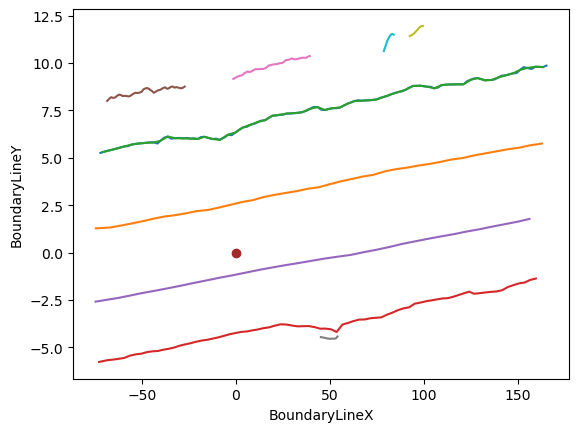

In [12]:
import matplotlib.pyplot as plt
line_sample = load_line('FH2369_20220218_133112')
filtered_df = line_sample[(line_sample['ptp_time'] > 1645192876.85)&(line_sample['ptp_time'] < 1645192876.95)]
ego_sample = load_ego_sample('FH2369_20220218_133112')
ego_sample = ego_sample[(ego_sample['ptp_time'] > 1645192876.85)&(ego_sample['ptp_time'] < 1645192876.95)]
merged_lines = []

for index, row in filtered_df.iterrows():
    if not merged_lines or row['TrackingID'] != merged_lines[-1]['TrackingID']:
        merged_lines.append(row)
    else:
        merged_lines[-1]['BoundaryLineX'].extend(row['BoundaryLineX'])
        merged_lines[-1]['BoundaryLineY'].extend(row['BoundaryLineY'])


for merged_line in merged_lines:
    plt.plot(merged_line['BoundaryLineX'], merged_line['BoundaryLineY'], label=f'Tracking ID {merged_line["TrackingID"]}')

plt.scatter(0, 0, color='brown', label='Ego Vehicle')

plt.xlabel('BoundaryLineX')
plt.ylabel('BoundaryLineY')

plt.show()

'FM1073_20220606_140009', [(1654524227.41, 1654524239.41)]

In [16]:
ego = load_ego_sample('FM1073_20220606_140009',(1654524227.41, 1654524239.41))

[Timestamp('2022-06-06 14:03:47.410000128'), Timestamp('2022-06-06 14:03:59.410000128')]


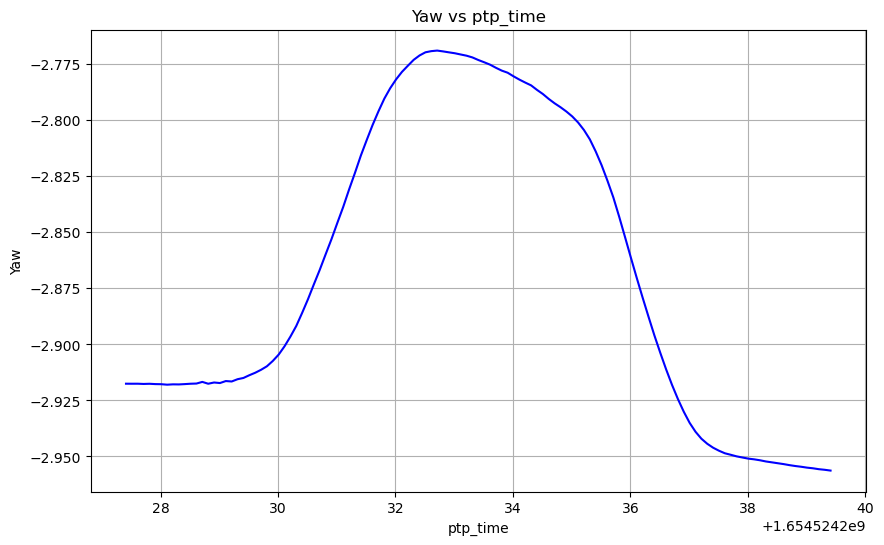

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(ego['ptp_time'], ego['Yaw'], linestyle='-', color='b', label='Yaw')

plt.xlabel('ptp_time')
plt.ylabel('Yaw')
plt.title('Yaw vs ptp_time')
plt.grid(True)

plt.show()

Text(0, 0.5, 'BoundaryLineY')

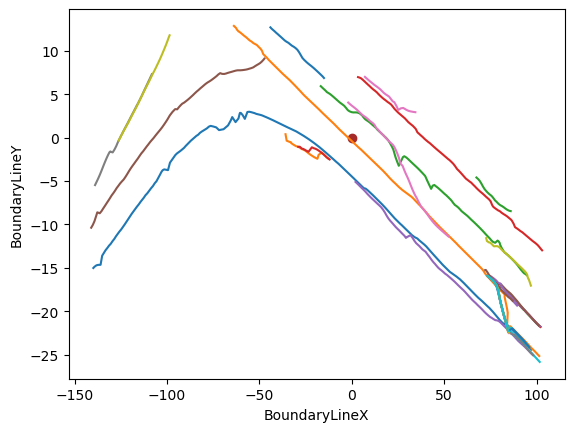

In [23]:
import matplotlib.pyplot as plt
line_sample = load_line('FM1073_20220606_140009')
filtered_df = line_sample[(line_sample['ptp_time'] > 1654524233.35)&(line_sample['ptp_time'] < 1654524233.45)]
ego_sample = load_ego_sample('FM1073_20220606_140009')
ego_sample = ego_sample[(ego_sample['ptp_time'] > 1654524227.41)&(ego_sample['ptp_time'] < 1654524239.41)]
merged_lines = []

for index, row in filtered_df.iterrows():
    if not merged_lines or row['TrackingID'] != merged_lines[-1]['TrackingID']:
        merged_lines.append(row)
    else:
        merged_lines[-1]['BoundaryLineX'].extend(row['BoundaryLineX'])
        merged_lines[-1]['BoundaryLineY'].extend(row['BoundaryLineY'])


for merged_line in merged_lines:
    plt.plot(merged_line['BoundaryLineX'], merged_line['BoundaryLineY'], label=f'Tracking ID {merged_line["TrackingID"]}')

plt.scatter(0, 0, color='brown', label='Ego Vehicle')

plt.xlabel('BoundaryLineX')
plt.ylabel('BoundaryLineY')

In [22]:
(1654524227.41+1654524239.41)/2

1654524233.41

In [8]:
import matplotlib.pyplot as plt

# Assuming load_line and load_ego_sample are defined elsewhere to load the data
line_sample = load_line('FM1073_20220606_140009')
filtered_df = line_sample[(line_sample['ptp_time'] > 1654524233.35) & (line_sample['ptp_time'] < 1654524233.45)]
ego_sample = load_ego_sample('FM1073_20220606_140009')
ego_sample = ego_sample[(ego_sample['ptp_time'] > 1654524227.41) & (ego_sample['ptp_time'] < 1654524239.41)]
merged_lines = []

# Calculate the reference PositionX and PositionY
reference_ego = ego_sample[(ego_sample['ptp_time'] > 1654524233.35) & (ego_sample['ptp_time'] < 1654524233.45)]
ref_pos_x = reference_ego['PositionX']
ref_pos_y = reference_ego['PositionY']

# Adjust PositionX and PositionY
ego_sample['AdjustedPositionX'] = ego_sample['PositionX'] - ref_pos_x
ego_sample['AdjustedPositionY'] = ego_sample['PositionY'] - ref_pos_y

for index, row in filtered_df.iterrows():
    if not merged_lines or row['TrackingID'] != merged_lines[-1]['TrackingID']:
        merged_lines.append(row)
    else:
        merged_lines[-1]['BoundaryLineX'].extend(row['BoundaryLineX'])
        merged_lines[-1]['BoundaryLineY'].extend(row['BoundaryLineY'])

for merged_line in merged_lines:
    plt.plot(merged_line['BoundaryLineX'], merged_line['BoundaryLineY'], label=f'Tracking ID {merged_line["TrackingID"]}')

# Plotting the ego vehicle's position with adjusted coordinates
plt.scatter(ego_sample['AdjustedPositionX'], ego_sample['AdjustedPositionY'], color='brown', label='Ego Vehicle')

plt.xlabel('BoundaryLineX')
plt.ylabel('BoundaryLineY')
plt.grid(True)
plt.show()

: 